In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

SRC_PV = "./../Ppv_actual_synthetic_data.csv"
SRC_LD = "./../Pload_actual_synthetic_data.csv"

data = list()

pv = pd.read_csv(SRC_PV, encoding='utf8').T
ld = pd.read_csv(SRC_LD, encoding='utf8').T

for (p, l) in zip(pv, ld):
    pv_list = pv[p].to_list()
    ld_list = ld[l].to_list()
    data.append(pv_list + ld_list)
    # data.append(ld_list)

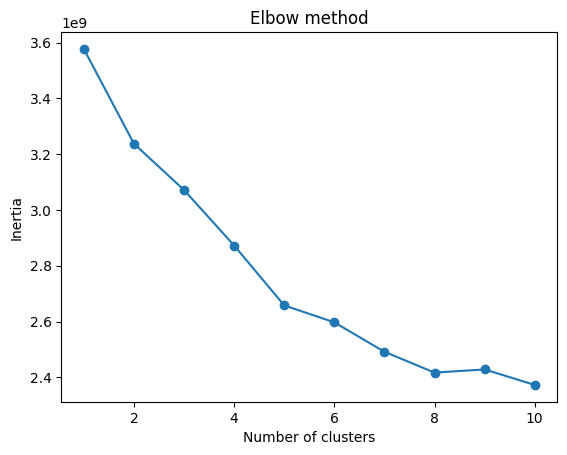

In [7]:
num_cluster = 11
inertias = []
for i in range(1,num_cluster):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,num_cluster), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



In [8]:
NC = 9
kmeans = KMeans(n_clusters=NC)
kmeans.fit(data)

print(kmeans.labels_)


[4 1 3 5 3 6 0 6 4 3 7 1 2 5 3 5 5 7 0 4 1 1 2 3 8 5 3 2 4 8 2 6 0 4 1 7 2
 8 8 8 0 8 7 7 1 7 5 6 5 6 6 0 2 0 5 7 8 3 0 1 8 1 7 5 2 6 7 8 1 1 1 1 6 8
 2 0 5 3 6 6 0 3 3 3 1 7 5 3 2 3 5 7 2 0 6 8 0 2 1 3 3 0 3 5 3 2 6 0 7 3 1
 6 8 5 4 7 2 7 1 0 8 6 6 2 4 5 0 7 1 7 3 5 6 2 0 0 2 4 7 1 3 6 7 3 7 3 6 5
 8 4 8 7 1 6 8 0 6 6 8 6 4 4 4 5 6 1 8 0 3 5 8 5 3 0 4 1 8 3 8 7 6 8 3 6 2
 0 6 0 4 7 1 4 6 3 7 0 6 3 3 3]


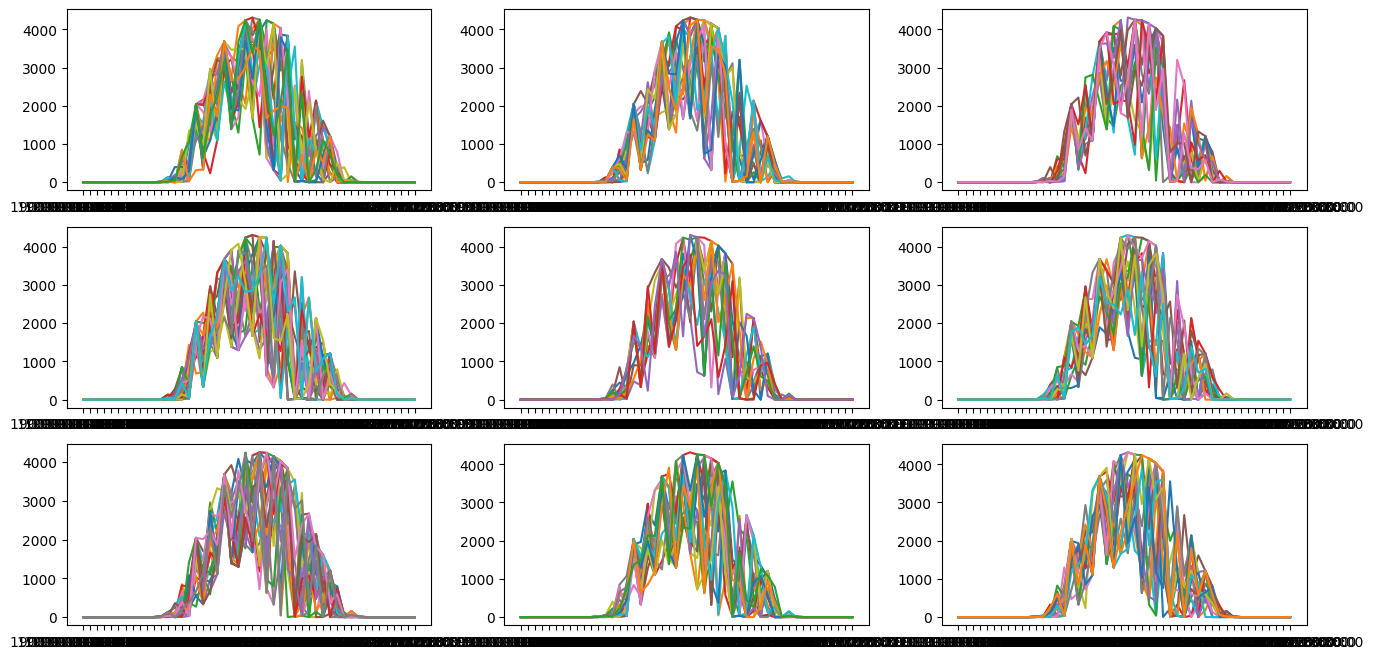

In [9]:
plt.figure(figsize=(16,8))

for i in range(len(pv.columns)):
    plt.subplot(3, 3, kmeans.labels_[i]+1)
    plt.plot(pv[i])

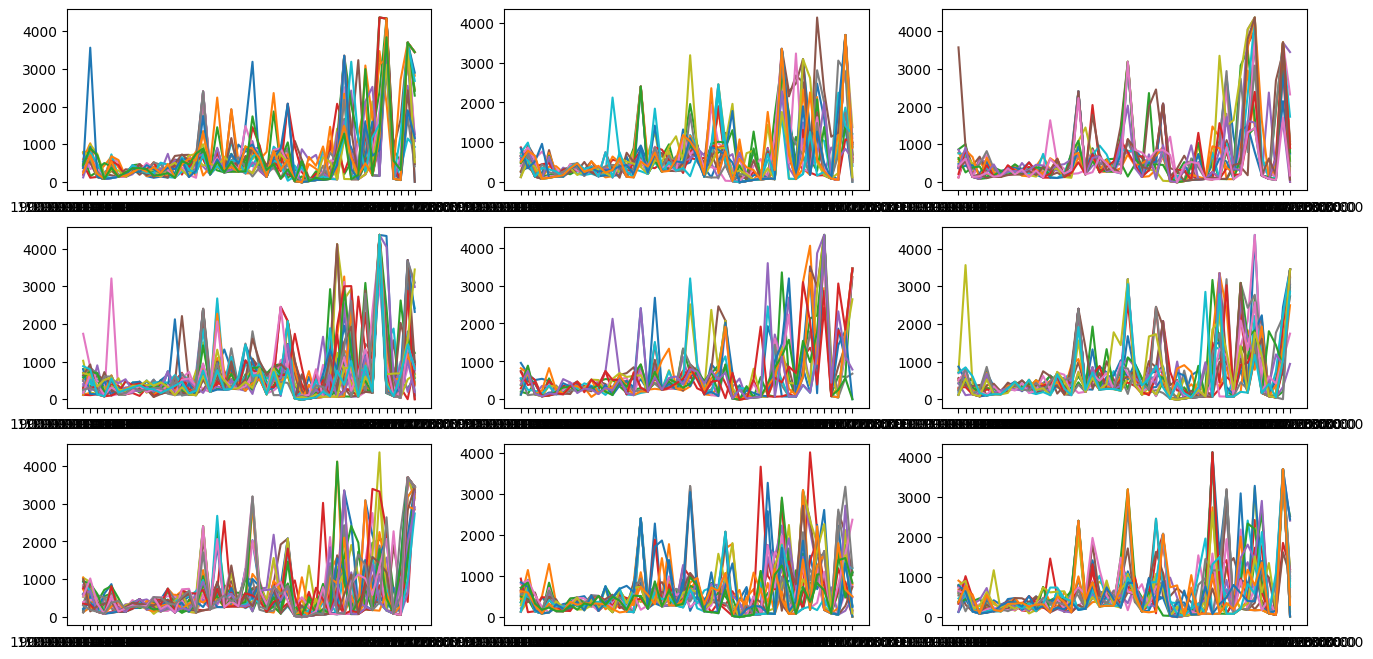

In [10]:
plt.figure(figsize=(16,8))
for i in range(len(pv.columns)):
    plt.subplot(3, 3, kmeans.labels_[i]+1)
    plt.plot(ld[i])